# Exploratory Data Analysis

In [2]:
%matplotlib inline
from utils import wrangle_data, predicted_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = wrangle_data(dummy=False)

In [4]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,false,gt_75,false,false,false,true,no_subd,https&issuer,lte_1_year,same_domain,...,other,false,gte_6_months,found,alexa_lt_100K,lt_0.2,true,1_or_2,legit,legit
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


No hay datos faltantes.

## Countplots

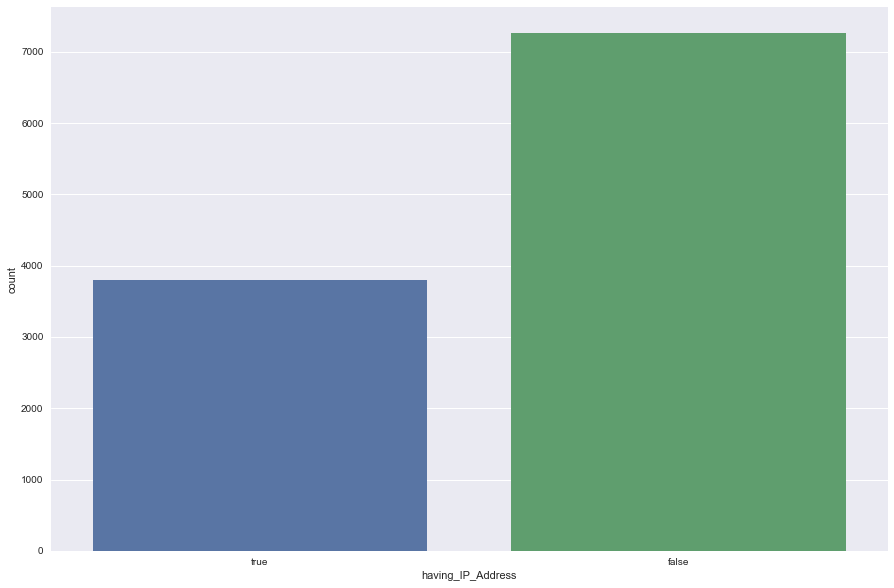

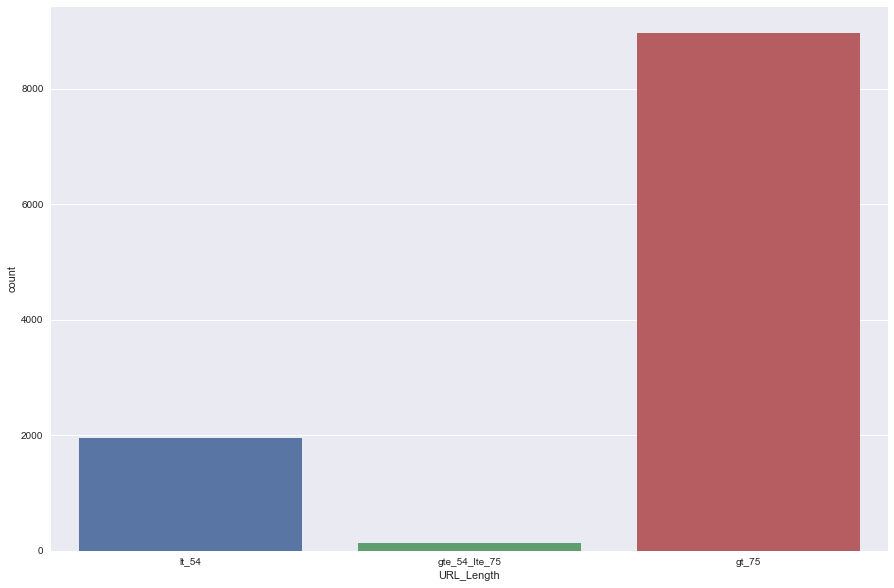

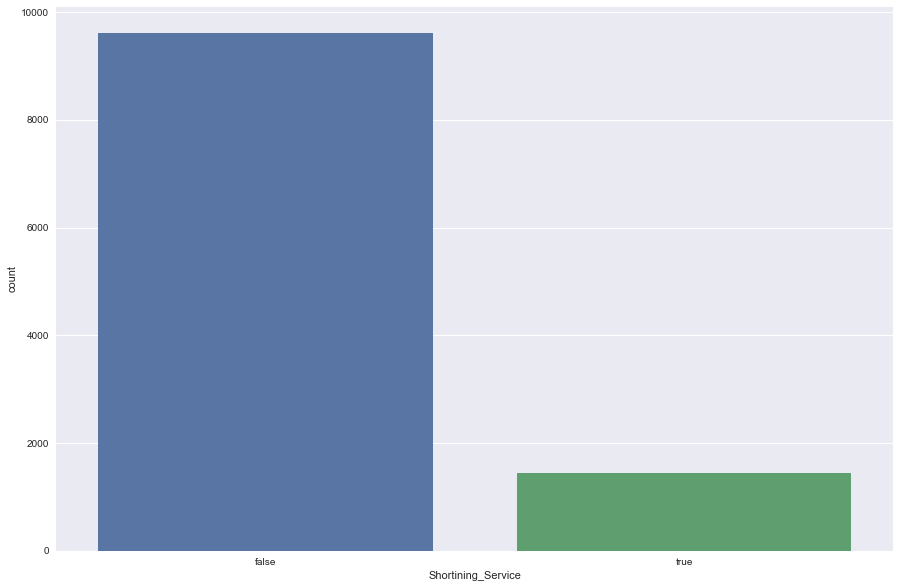

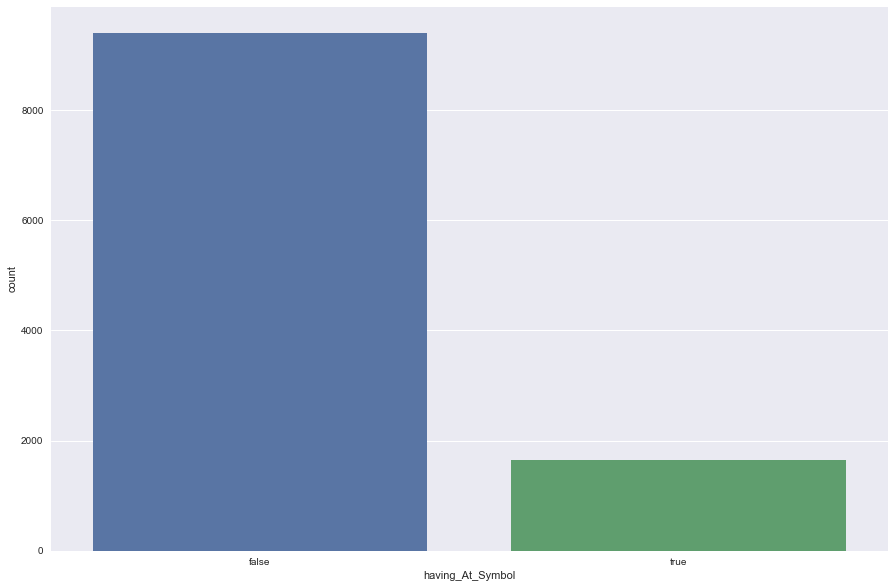

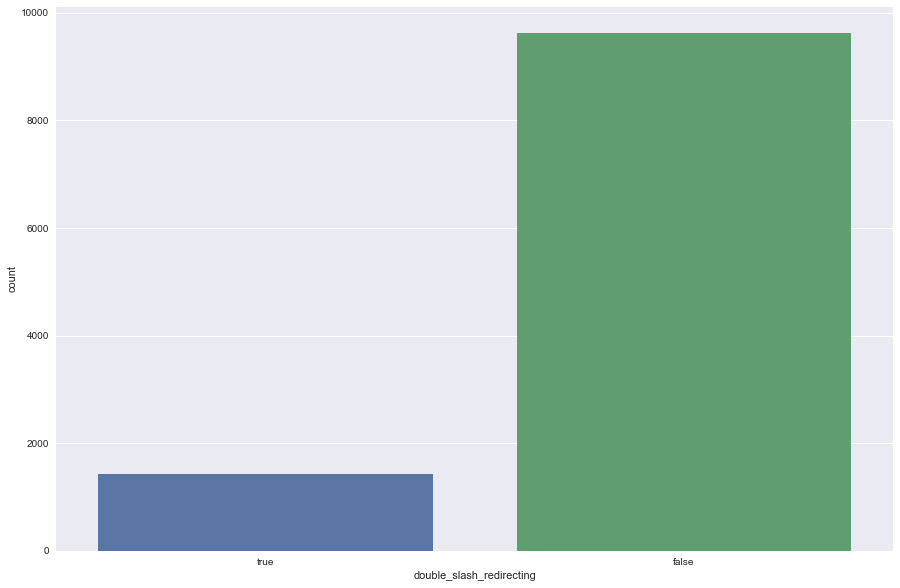

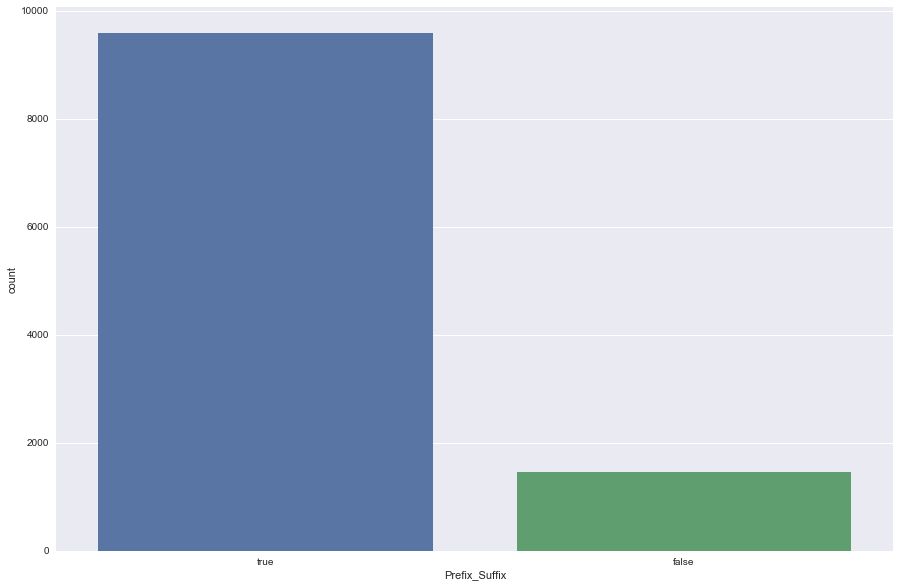

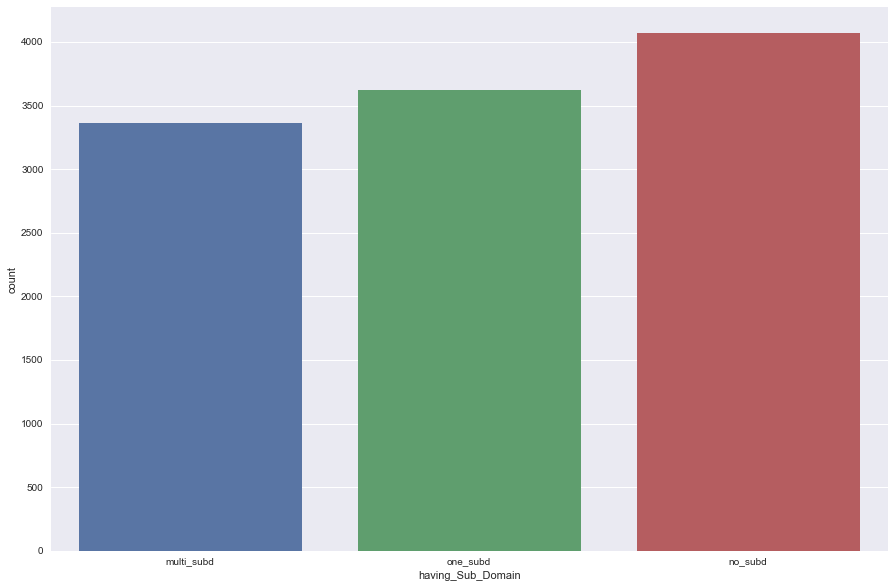

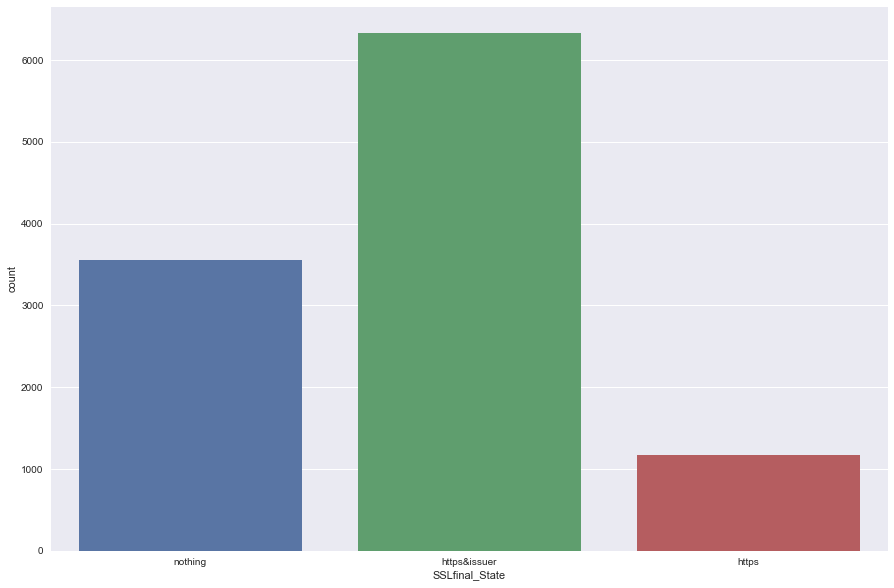

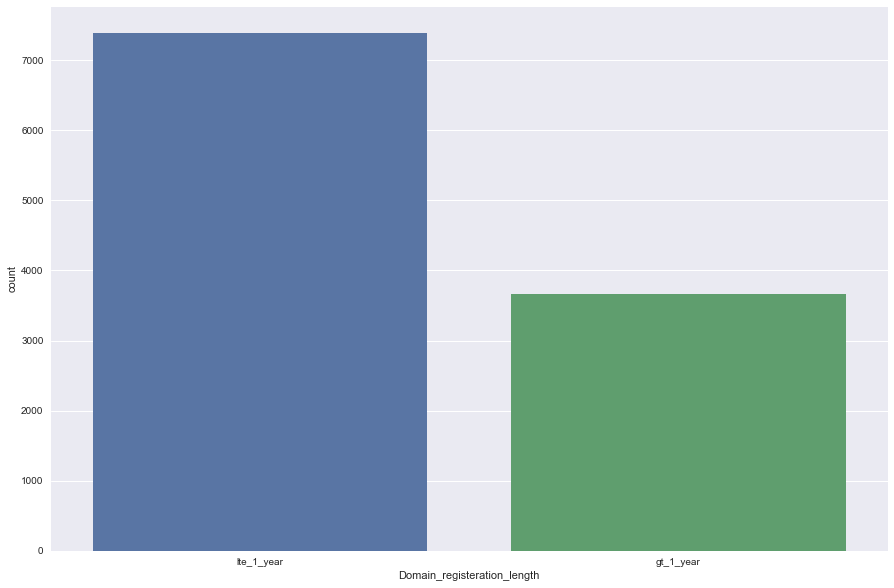

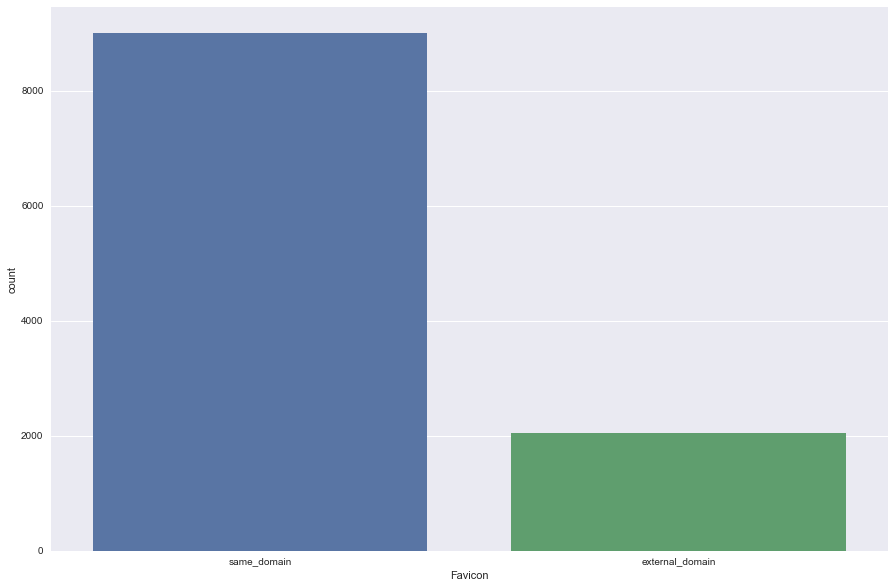

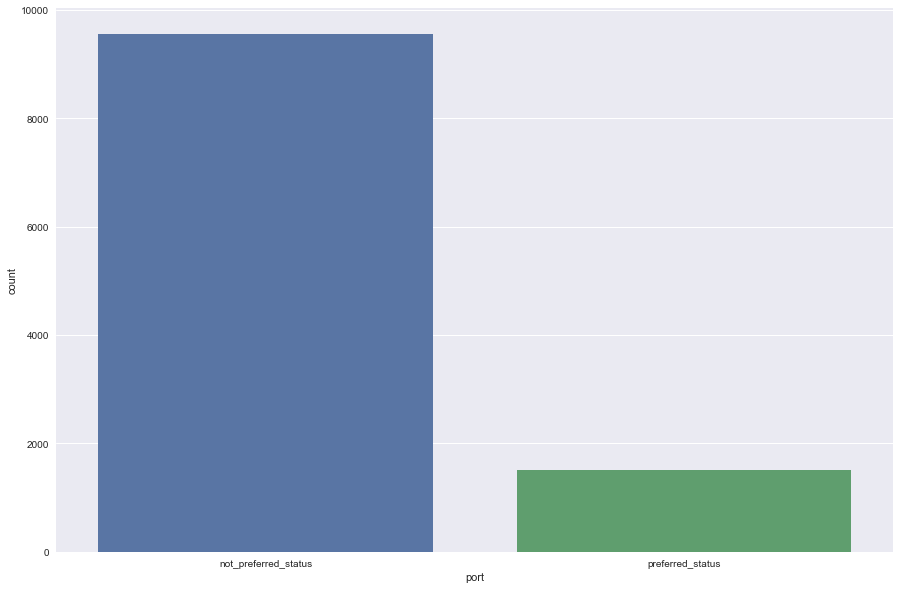

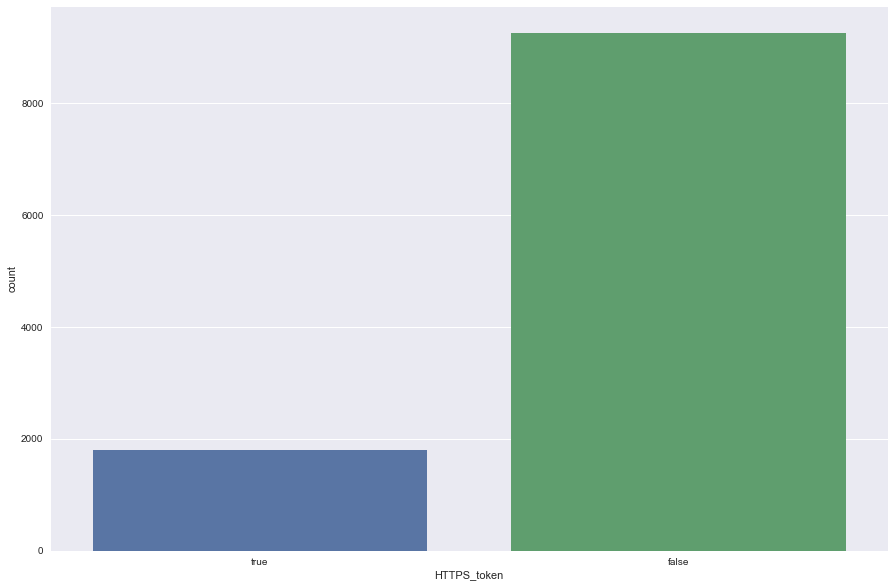

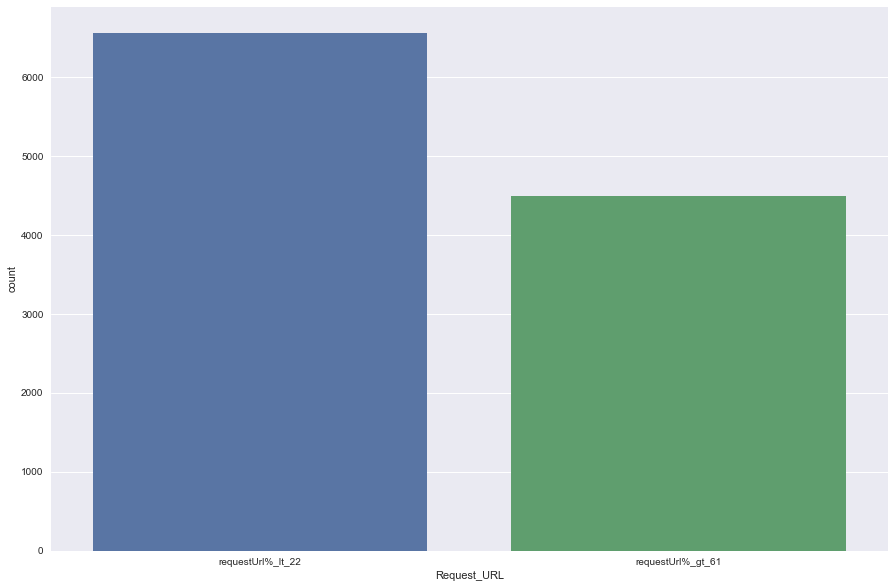

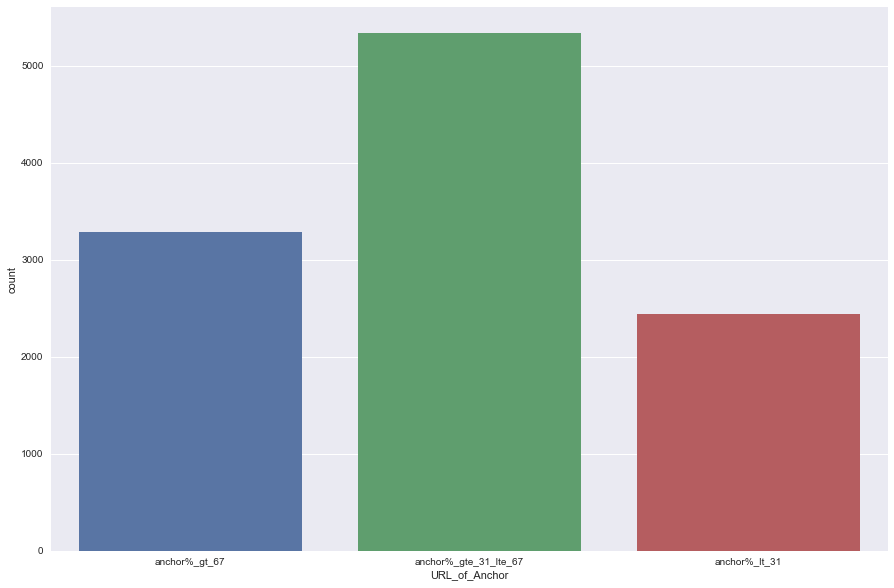

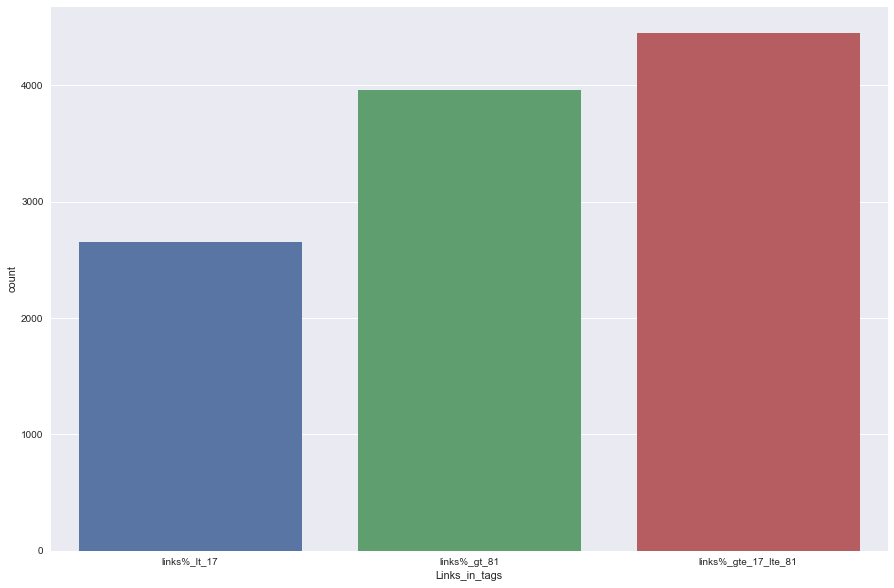

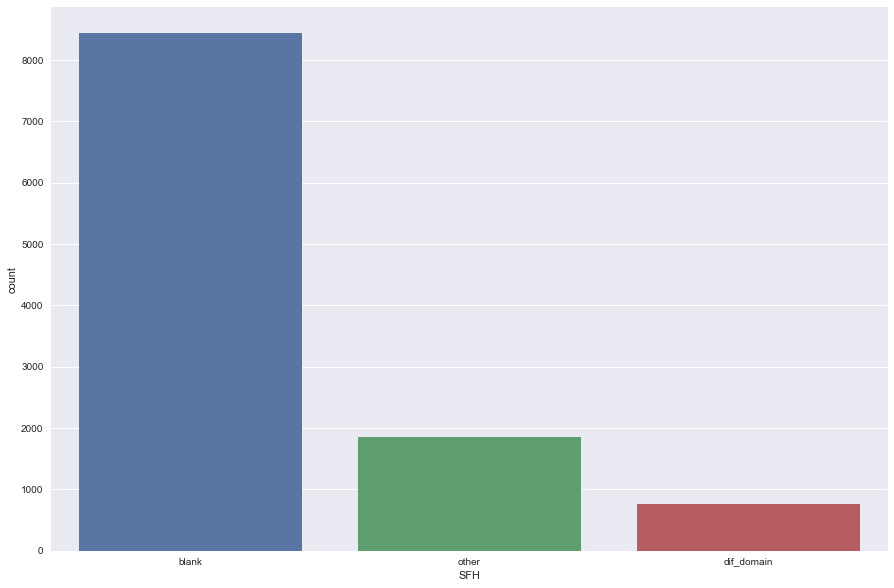

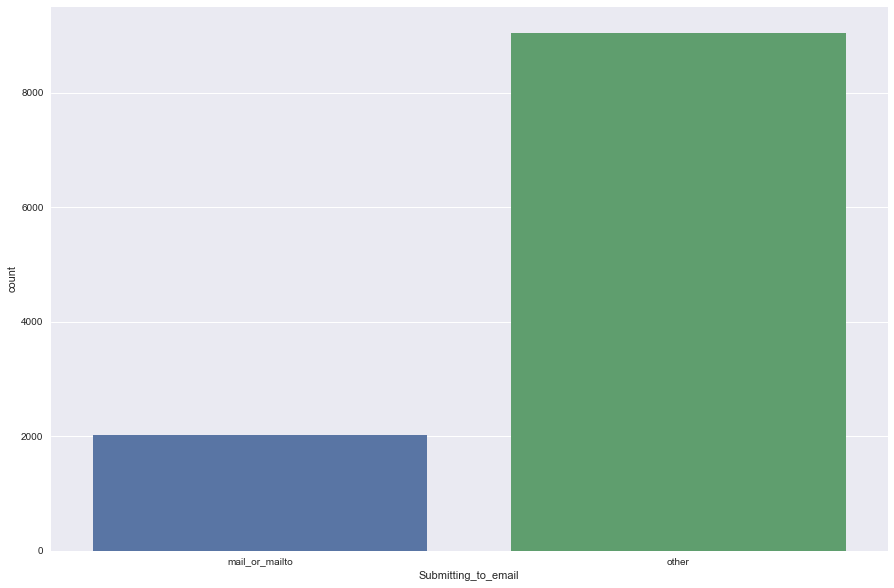

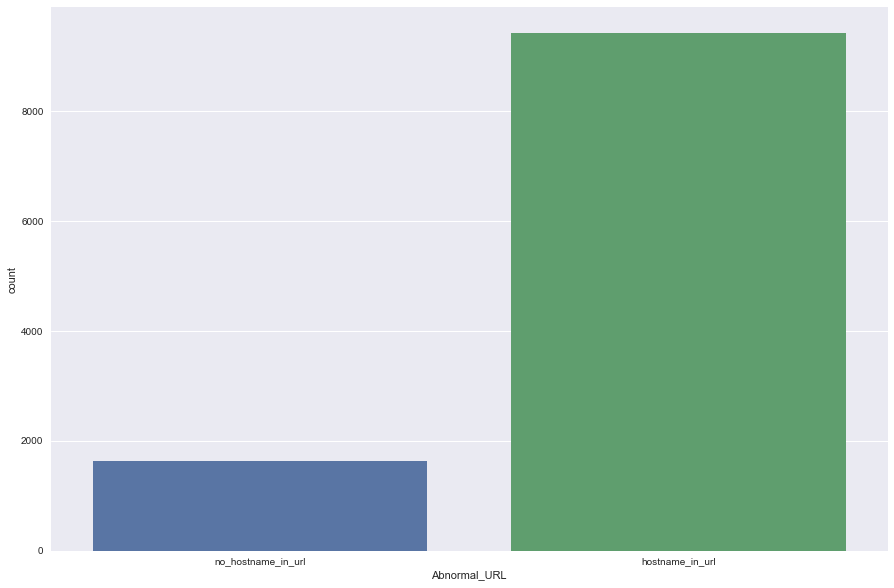

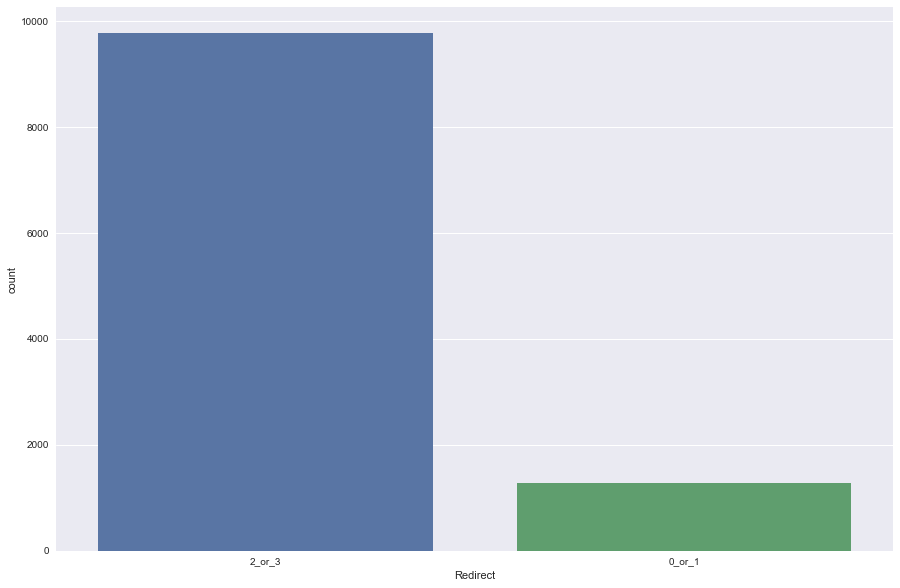

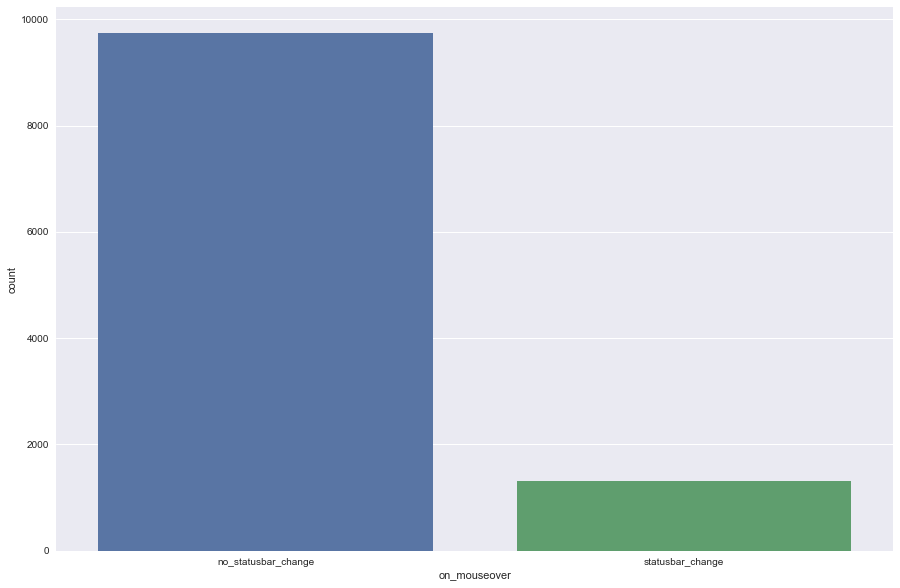

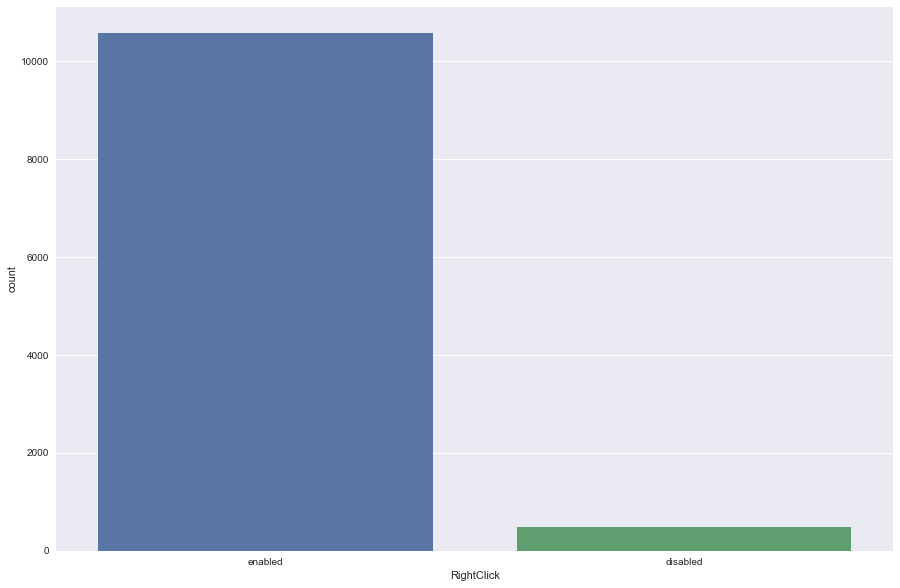

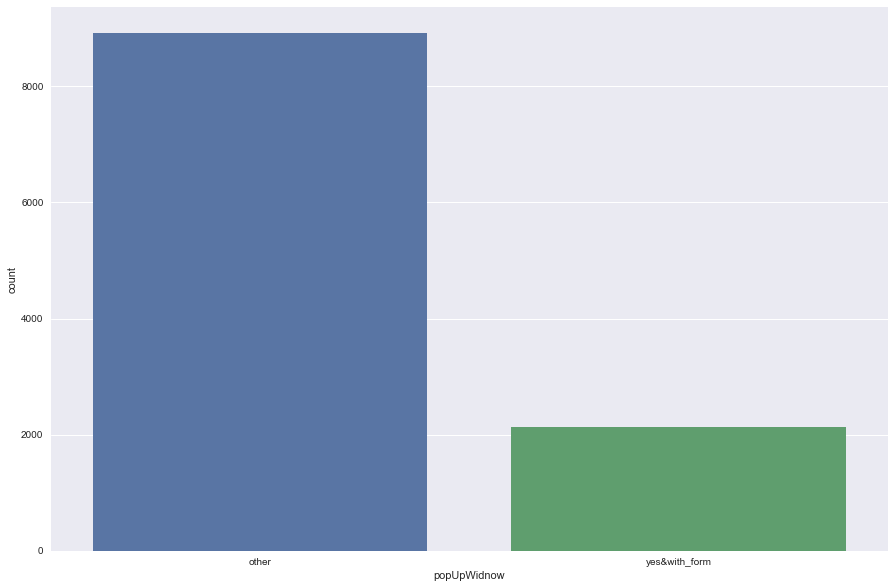

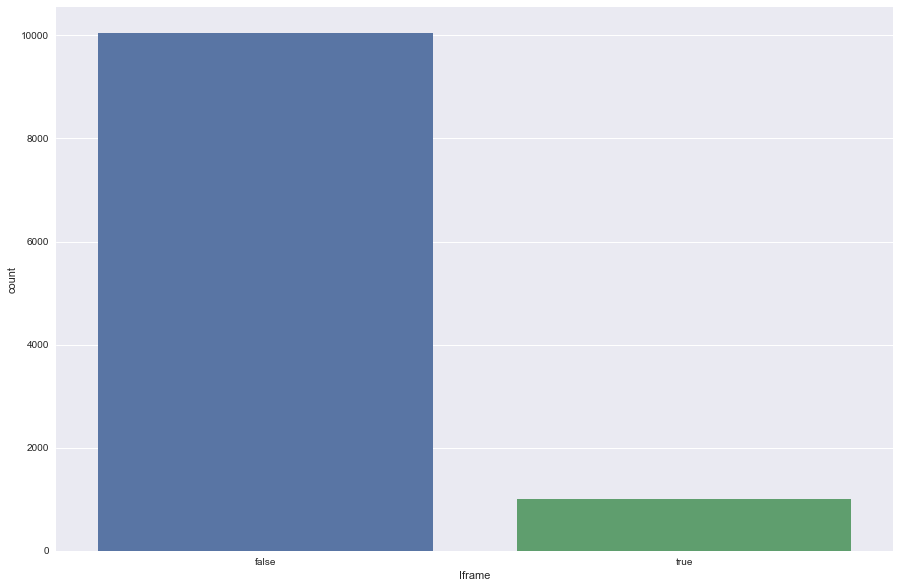

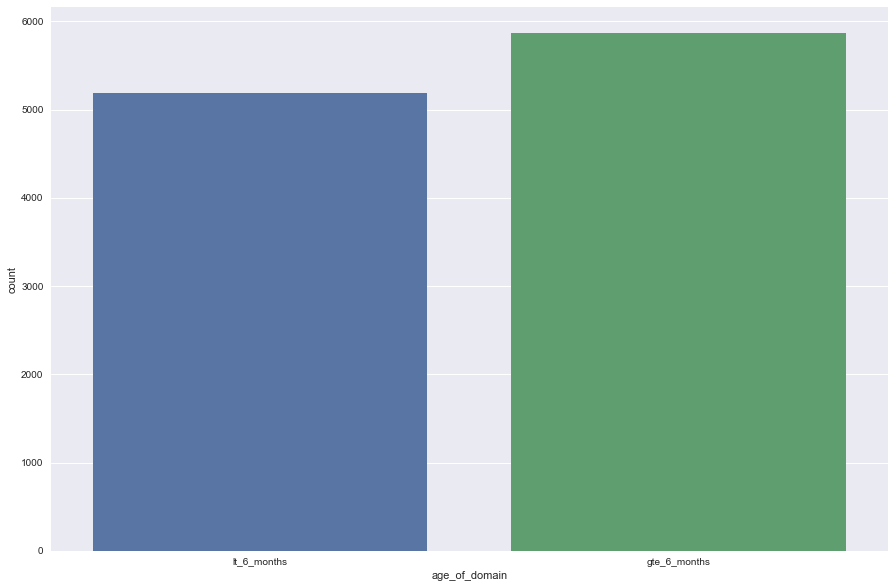

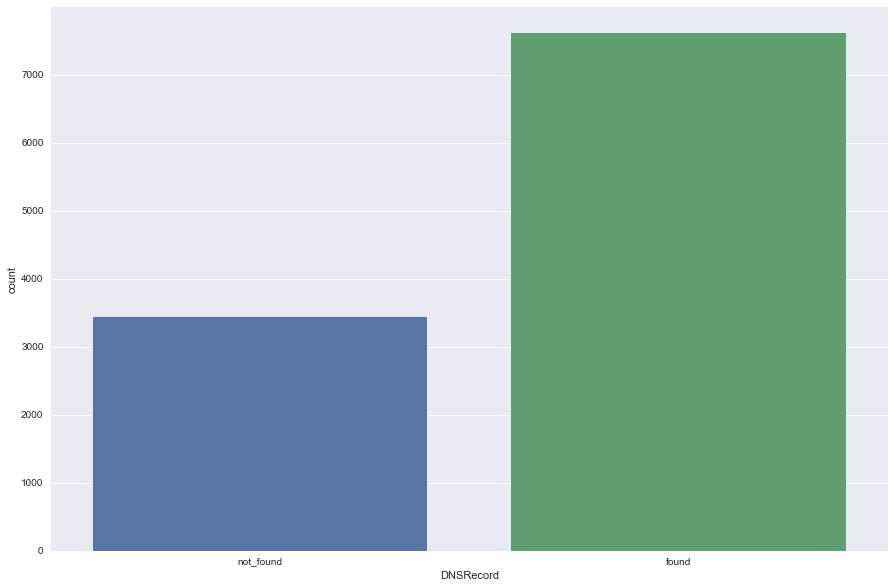

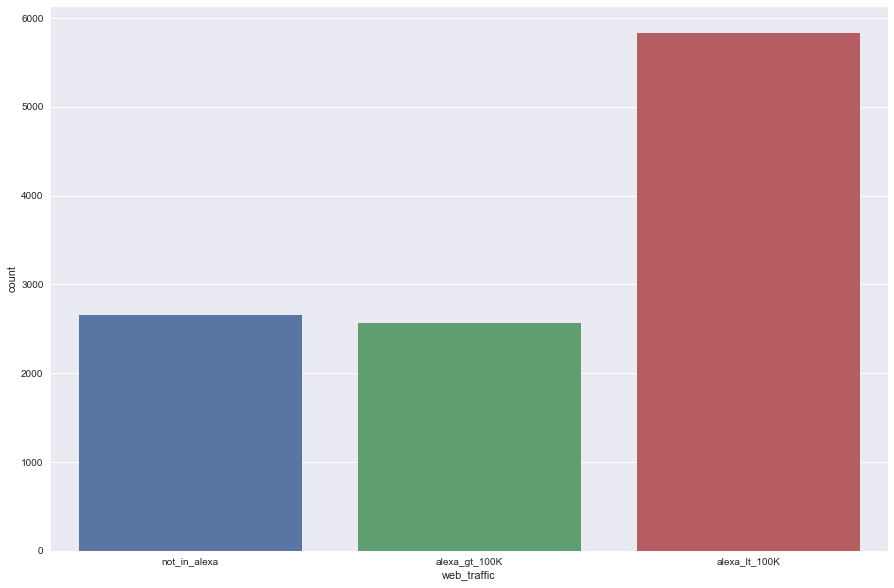

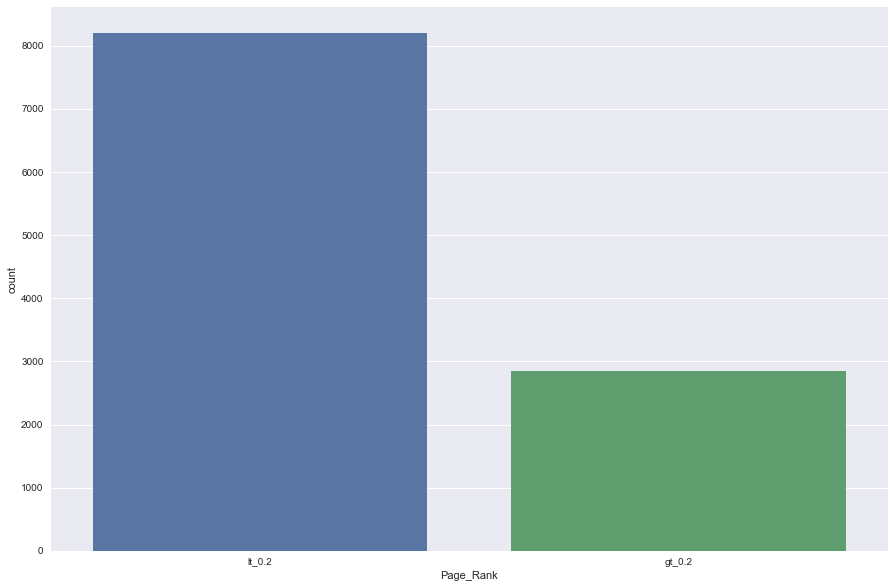

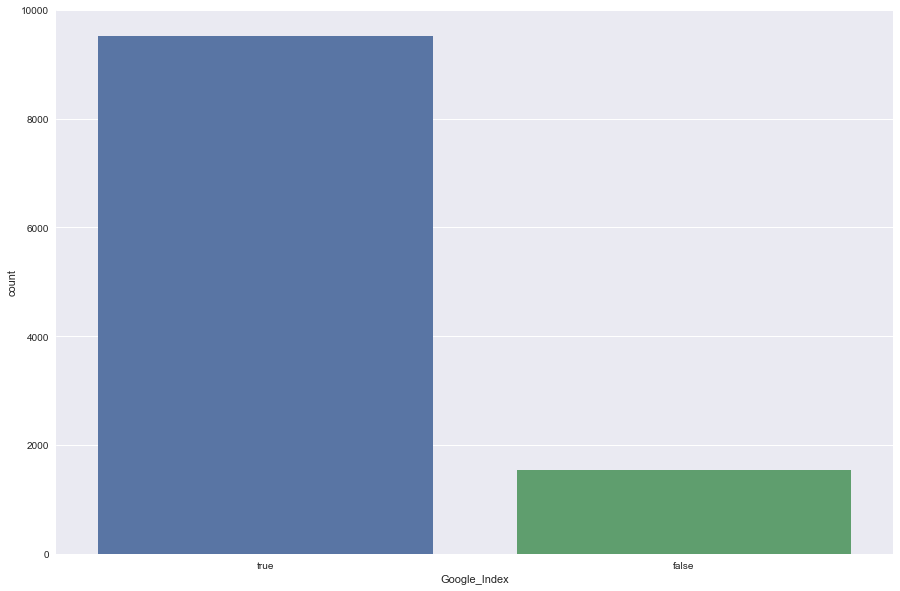

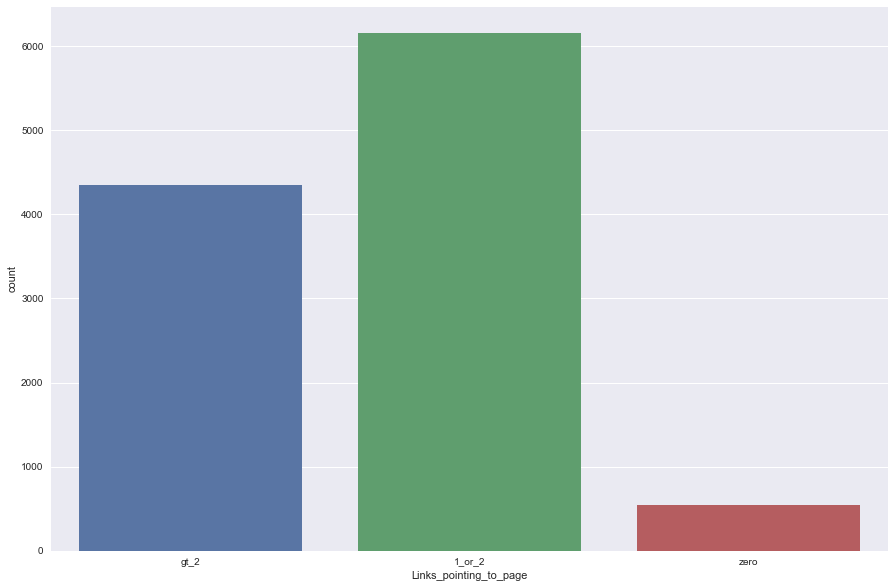

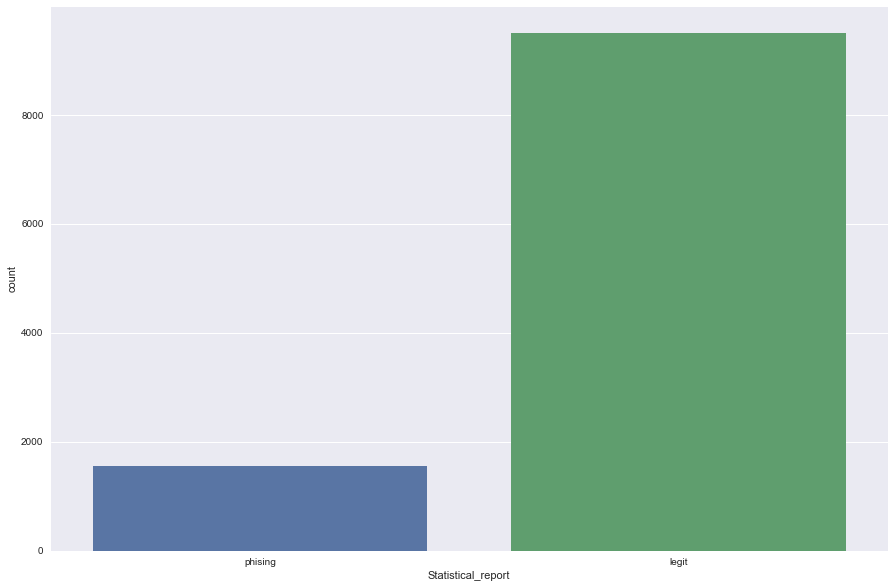

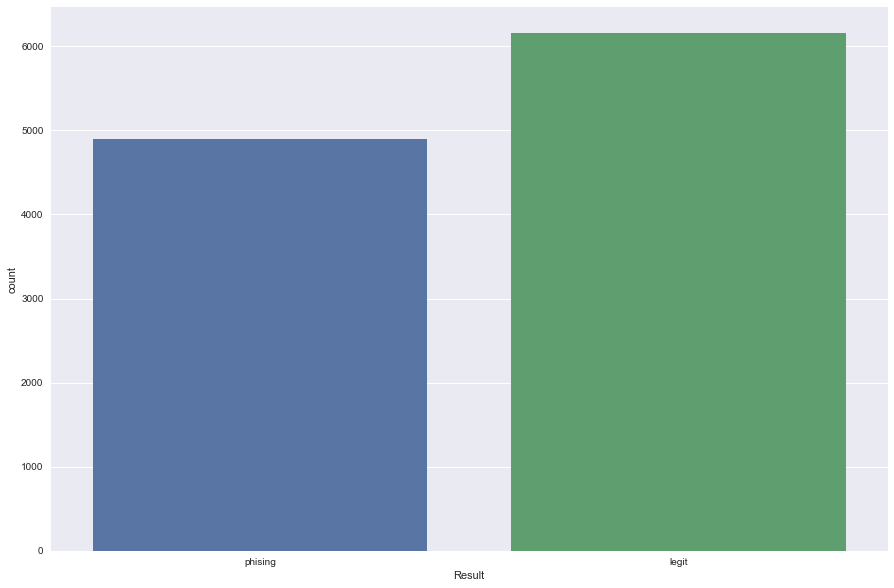

In [5]:
for col in list(df.columns):
    sns.plt.figure(figsize=(15, 10))
    sns.countplot(x=col, data=df)
    sns.plt.show()

### Features vs Result

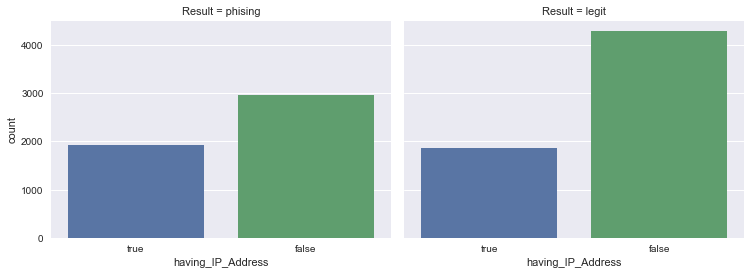

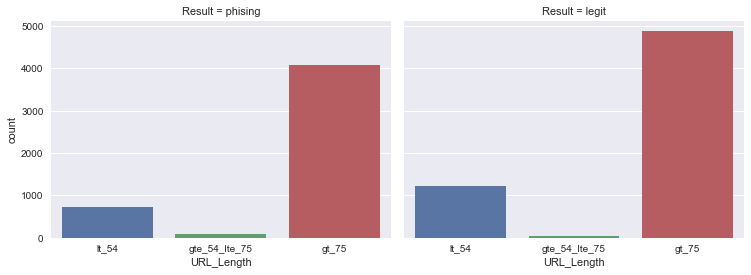

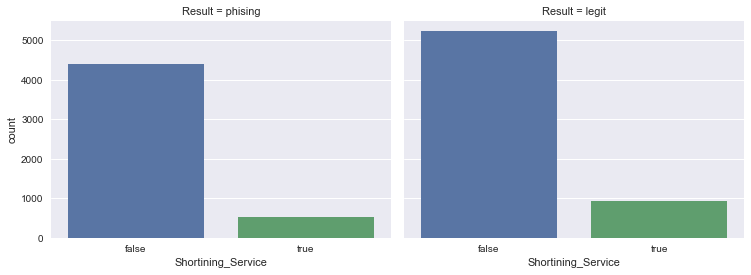

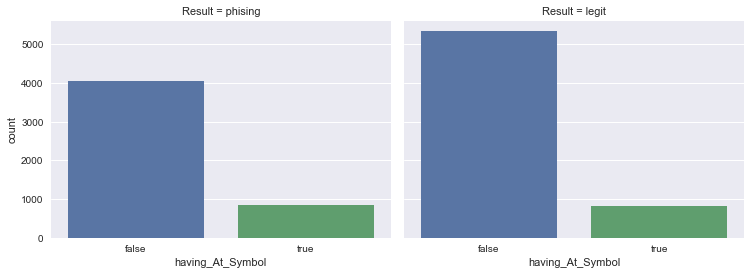

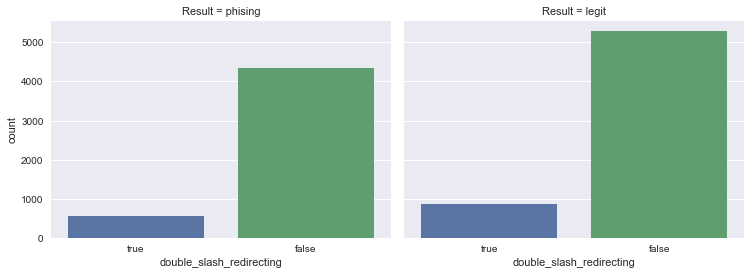

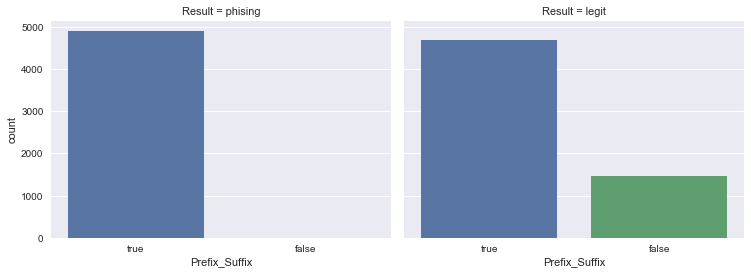

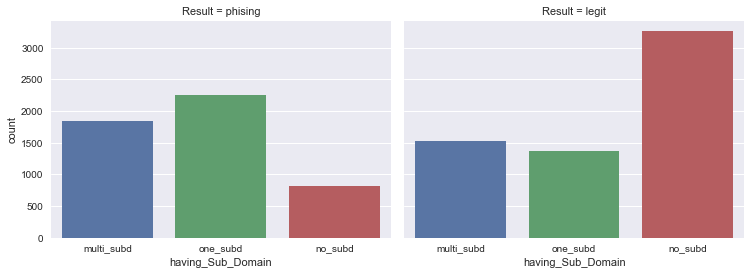

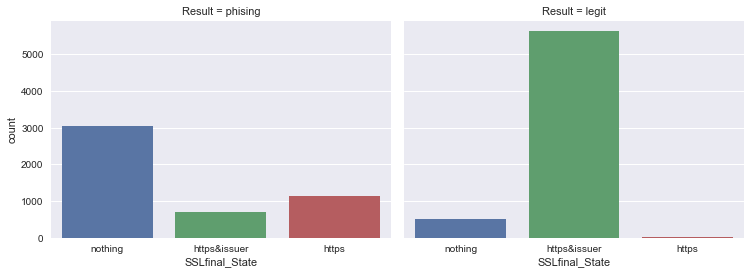

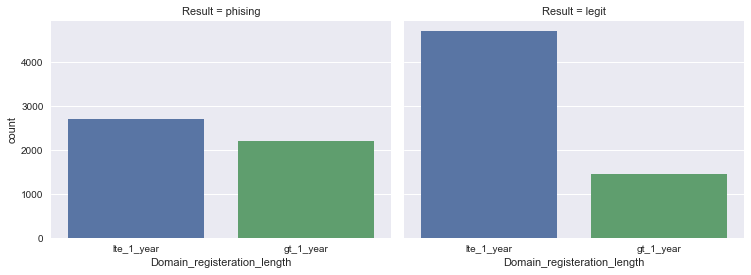

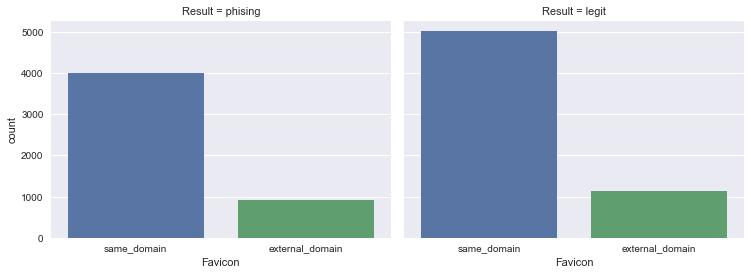

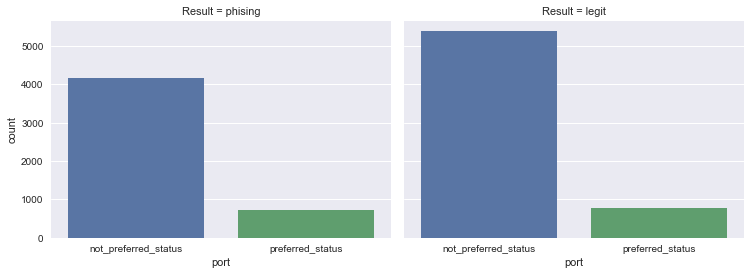

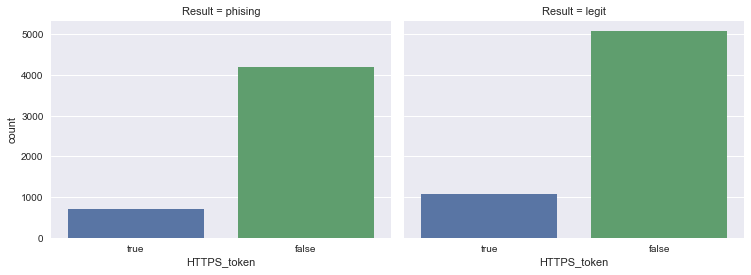

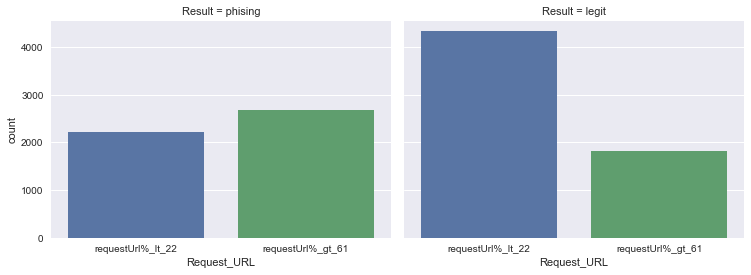

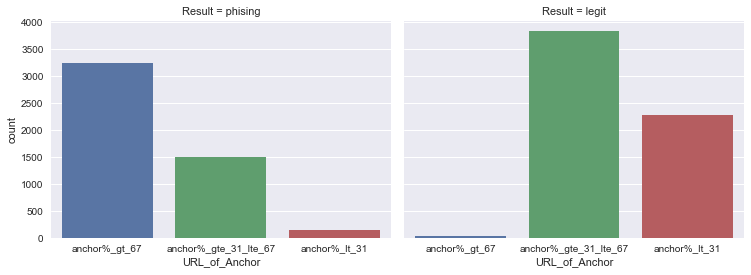

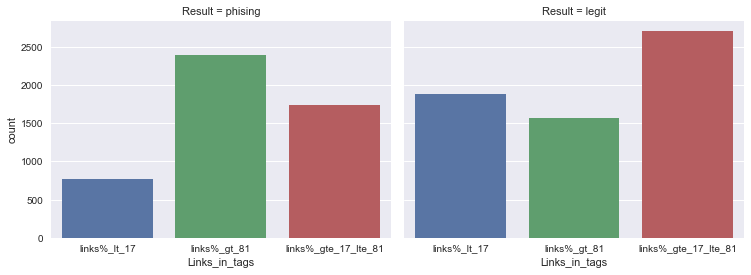

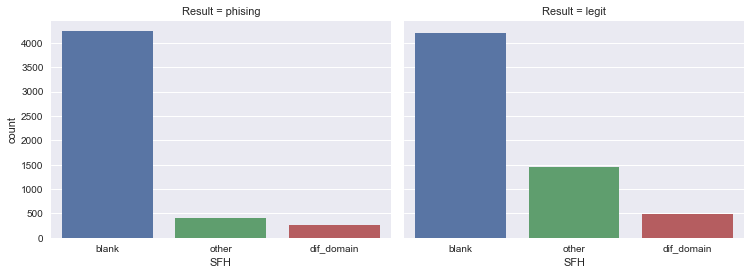

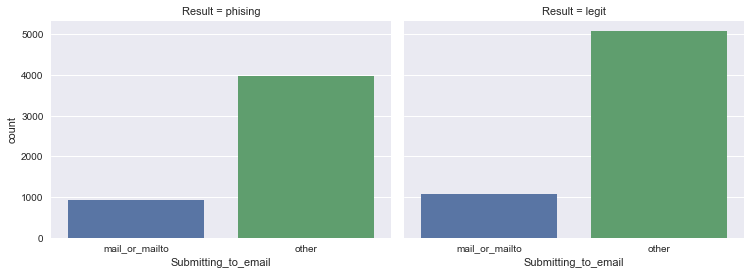

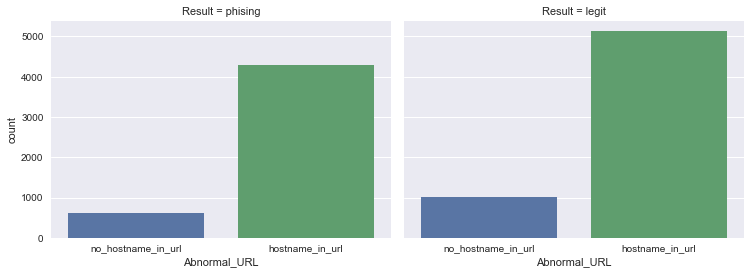

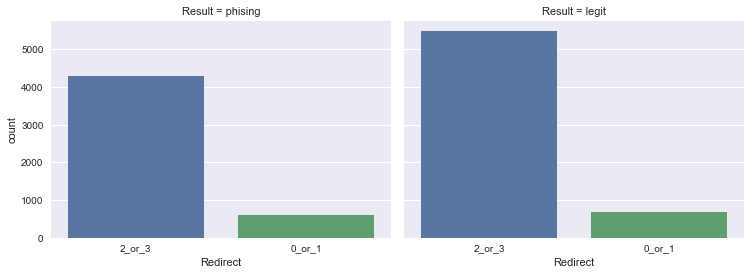

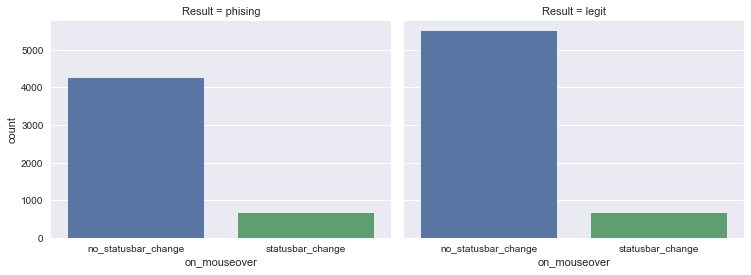

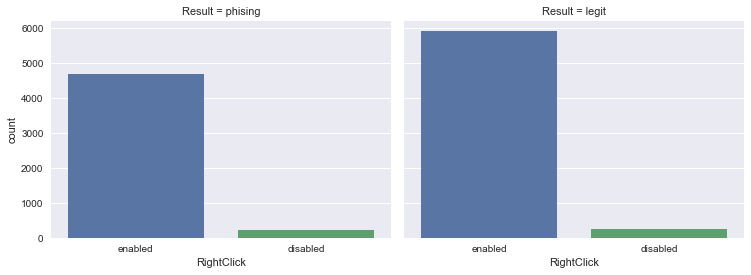

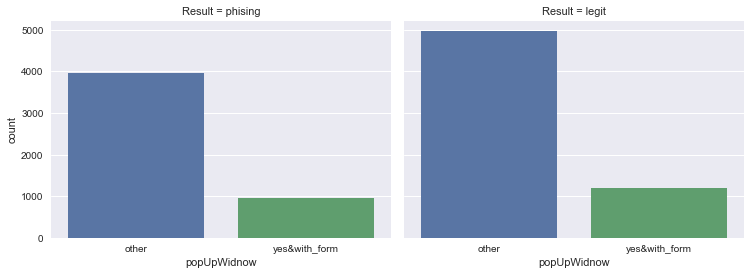

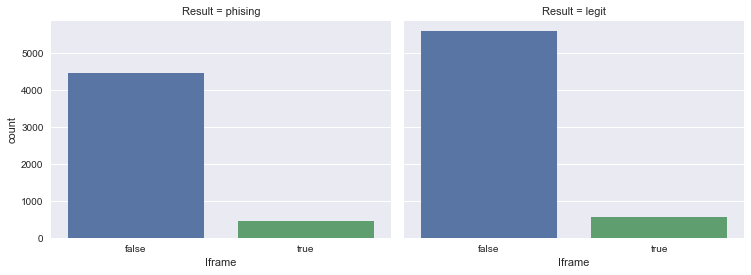

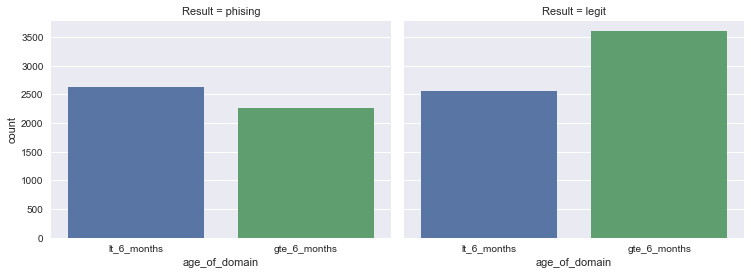

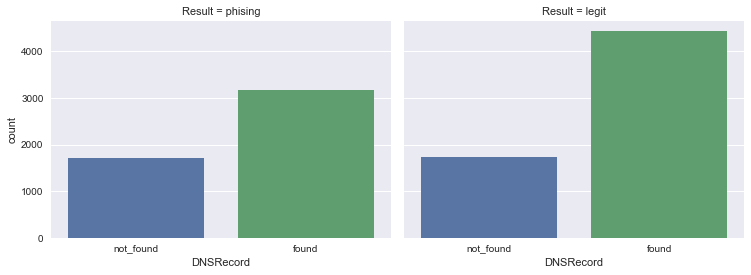

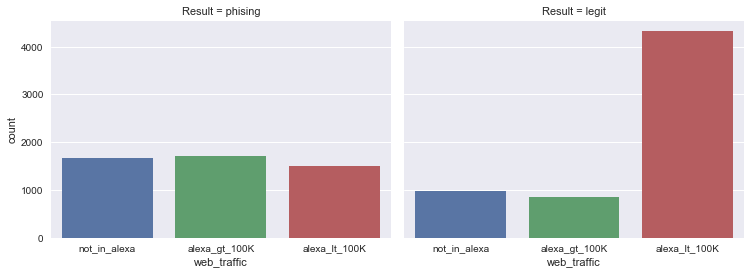

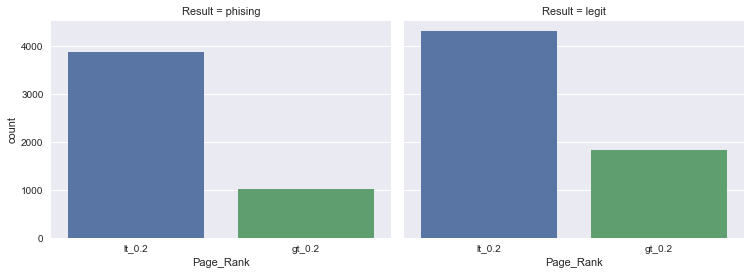

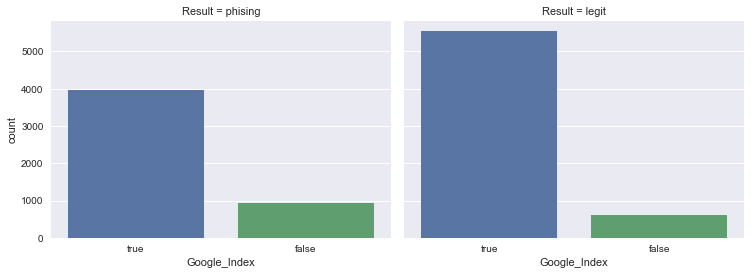

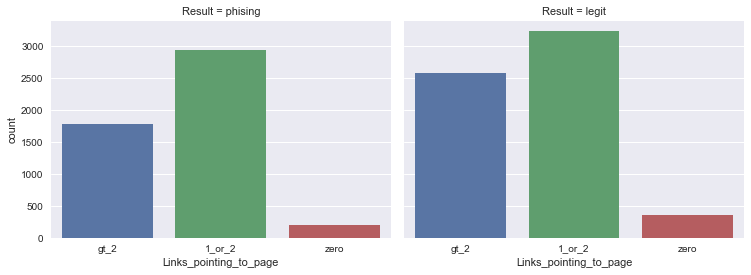

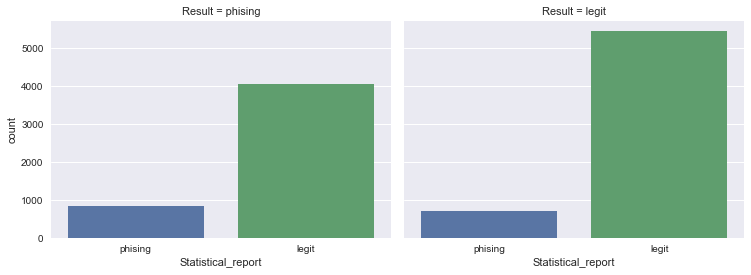

In [6]:
for col in list(df.columns):    
    if col != 'Result':
        sns.factorplot(x=col, col='Result',
                       col_wrap=2,
                       data=df, kind='count', size=4, 
                       aspect=1.3) 
        
        sns.plt.show()

Hay algunos atributos cuyos valores permiten ayudan a distinguir claramente si un sitio Web es phishing o no. Algunos de esos atributos son:

* Prefix_Suffix: Esta variable indica si hay un guión en la URL o no. Como vemos, siempre que no hay un guión en la URL se trata de un caso que no es phishing.
* having_Sub_Domain: Se puede apreciar que, para sitios benignos, no suele haber subdominios. Para los casos de phishing, predomina la presencia de un subdominio o varios.
* SSLfinal_State: Especialmente el valor https&issuer (el sitio utiliza HTTPS y el proveedor de los certificados es confiable) es indicador de que el sitio Web no es un caso de phishing.
* URL_of_Anchor: Mide el porcentaje de etiquetas de enlaces HTML que redirigen a otros sitios con diferente nombre de dominio o que directamente no redirigen a ningún otro sitio. Cuando el porcentaje es menor al 31% suelen ser claramente sitios benignos pero cuando el porcentaje es mayor del 67% se suele tratar de casos de phishing.
* age_of_domain: En los sitios Web sanos es más común que el dominio tenga una antigüedad de 6 meses o más.
* DNSRecord: Suele haber registros del DNS en Whois o bien del propio dominio con más frecuencia de los sitios sin phishing.
* web_traffic: La mayoría de sitios Web legítimos suelen estar en el top 100.000 del Ranking Alexa.


Para el resto de variables hay pequeñas diferencias pero no tan claras como en las variables descritas.

## Statistical Report vs Reality

El objetivo es ver cómo de bueno es el informe estadístico basado en https://www.phishtank.com/ y https://www.stopbadware.org/.

Tanto aquí como en futuros análisis, "legit" será la clase positiva y "phishing" la clase negativa. Por lo tanto, es interesante hacer que el número de falsos positivos (falsos "legit") sea el mínimo posible: pondremos especial interés en la medida precision.

In [8]:
predicted_report(df['Result'], df['Statistical_report'])

Predicted  legit  phising    All
Actual                          
legit       5446      711   6157
phising     4059      839   4898
All         9505     1550  11055

Accuracy: 0.568521

             precision    recall  f1-score   support

      legit       0.57      0.88      0.70      6157
    phising       0.54      0.17      0.26      4898

avg / total       0.56      0.57      0.50     11055



Como se puede apreciar, los valores de las diferentes medidas de acierto son bastante bajos. Nuestro objetivo será realizar un análisis que permita una mejor predicción de la ya existente en la columna Statistical_report.